In [ ]:
pip install python-igraph

In [ ]:
pip install geopandas

In [ ]:
import igraph as ig
import matplotlib.pyplot as plt

net_name="aerial"
node_attributes = ['X', 'Y', 'name', 'utp', 'label', 'geocode', 'size', 'label_size']
edge_attributes=['source', 'target', 'weight']

g_ori = ig.Graph.Read_GraphML(net_name + ".GraphML")

In [ ]:
import pandas as pd

nodes = pd.DataFrame(columns = node_attributes)
for node in g_ori.vs:
  attrs={}
  for attr in node_attributes:
    attrs[attr] = node[attr]
  nodes = nodes.append(attrs, ignore_index=True)
nodes

,X,Y,name,utp,label,geocode,size,label_size
0,-55.67734,-12.74184,6ASO,725.0,SORRISO,5107925.0,2.346667,2.0
1,-49.12613,-22.25399,SBAE,40.0,BAURU,3506003.0,2.693333,2.0
2,-43.45093,-22.92322,SBAF,284.0,RIO DE JANEIRO,3304557.0,7.546667,2.0
3,-49.27419,-16.64333,SBAN,117.0,GOIÂNIA,5208707.0,5.120000,2.0
4,-48.18132,-21.79165,SBAQ,25.0,ARARAQUARA,3503208.0,2.000000,2.0
...,...,...,...,...,...,...,...,...
147,-58.06092,-4.98478,SWMW,586.0,MAUÉS,1302900.0,2.173333,2.0
148,-56.85409,-2.68840,SWPI,238.0,PARINTINS,1303403.0,2.693333,2.0
149,-54.22052,-15.09740,SWPY,660.0,PRIMAVERA DO LESTE,5107040.0,2.346667,2.0
150,-55.50015,-11.71172,SWSI,324.0,SINOP,5107909.0,2.346667,2.0


In [ ]:
from shapely.geometry import Point
geometry = [Point(x) for x in zip(nodes[node_attributes[0]], nodes[node_attributes[1]])]
import geopandas as gpd
crs = {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}

geo_data = gpd.GeoDataFrame(nodes, crs = crs, geometry = geometry)
geo_data.head()

,X,Y,name,utp,label,geocode,size,label_size,geometry
0,-55.67734,-12.74184,6ASO,725.0,SORRISO,5107925.0,2.346667,2.0,POINT (-55.67734 -12.74184)
1,-49.12613,-22.25399,SBAE,40.0,BAURU,3506003.0,2.693333,2.0,POINT (-49.12613 -22.25399)
2,-43.45093,-22.92322,SBAF,284.0,RIO DE JANEIRO,3304557.0,7.546667,2.0,POINT (-43.45093 -22.92322)
3,-49.27419,-16.64333,SBAN,117.0,GOIÂNIA,5208707.0,5.120000,2.0,POINT (-49.27419 -16.64333)
4,-48.18132,-21.79165,SBAQ,25.0,ARARAQUARA,3503208.0,2.000000,2.0,POINT (-48.18132 -21.79165)


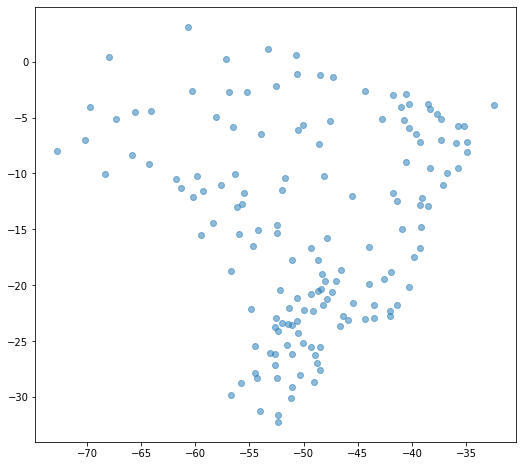

In [ ]:
import os

dir = './'
if not os.path.exists(dir):
     os.makedirs(dir)

geo_data.to_file(dir + 'CENTROIDES.shp')

geo_data.plot(figsize=(15,8), alpha=0.5)

In [ ]:
edges = pd.DataFrame(columns = edge_attributes)

for edge in g_ori.es:
  attrs={}

  attrs[edge_attributes[0]] = nodes.loc[edge.source]['geometry']
  attrs[edge_attributes[1]] = nodes.loc[edge.target]['geometry']
  for i in range(2,len(edge_attributes)):
    attrs[edge_attributes[i]] = edge[edge_attributes[i]]
  edges = edges.append(attrs, ignore_index=True)
edges

,source,target,weight
0,POINT (-55.67734 -12.74184),POINT (-47.79736 -15.78069),37.0
1,POINT (-55.67734 -12.74184),POINT (-55.95447 -15.45261),3973.0
2,POINT (-55.67734 -12.74184),POINT (-50.08079 -25.1397),38.0
3,POINT (-49.12613 -22.25399),POINT (-46.64811 -23.65008),34244.0
4,POINT (-49.12613 -22.25399),POINT (-49.98309 -22.17779),79.0
...,...,...,...
491,POINT (-67.33747 -5.11852),POINT (-70.21825 -7.022),17.0
492,POINT (-59.83805 -10.18684),POINT (-59.32982 -11.53375),1162.0
493,POINT (-52.40818 -14.59911),POINT (-54.22052 -15.0974),60.0
494,POINT (-59.32982 -11.53375),POINT (-58.3177 -14.42351),280.0


In [ ]:
from shapely.geometry import Point, LineString

lines = [LineString(xy) for xy in zip(edges[edge_attributes[0]], edges[edge_attributes[1]])]

edges_graph = gpd.GeoDataFrame(edges, crs=geo_data.crs, geometry = lines)

edges_graph[[edge_attributes[0], edge_attributes[1]]] = edges_graph[[edge_attributes[0], edge_attributes[1]]].astype(str) 

import os

dir = './'
if not os.path.exists(dir):
    os.makedirs(dir)

edges_graph.to_file(dir + 'EDGES_SHAPEFILE.shp')

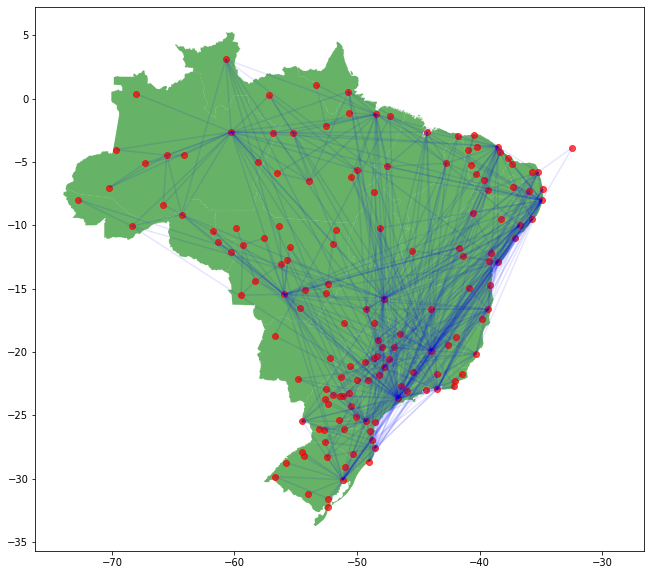

In [ ]:
centroides = gpd.read_file('CENTROIDES.shp')
edges = gpd.read_file('EDGES_SHAPEFILE.shp')

try:
  brasil = gpd.read_file('BR_UF_2020.shp')
  base = brasil.plot(color='green', figsize=(15,10), alpha=0.6)
  centroides.plot(ax=base, figsize=(15,10), color='red', alpha=0.7)
except:
  base = centroides.plot(color='green', figsize=(15,10), alpha=0.6)
edges.plot(ax=base, figsize=(15,10), color='blue', alpha=0.1)